#

In [45]:
import pandas as pd

In [46]:
import matplotlib as mpl

In [47]:
import matplotlib.pyplot as plt

In [48]:
import numpy as np

In [49]:
from pathlib import Path

In [50]:
import pingouin as pg

In [51]:
from lets_plot import *

In [52]:
LetsPlot.setup_html(no_js=True)

In [53]:
plt.style.use(

    "https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt"
)

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
import pandas as pd
file_path = '游戏.xlsx'
df = pd.read_excel(file_path, header=1)

In [56]:
df.columns = df.columns.str.strip()

In [57]:
file_path = '游戏.xlsx'
df = pd.read_excel(file_path, header=0)

In [58]:
df.columns = ['Round_Label', 'Round_10', 'Round_9', 'Round_8', 'Round_7', 'Round_6', 'Round_5', 'Round_4', 'Round_3', 'Round_2', 'Round_1']
round_data = df.iloc[1, 1:]
round_numbers = list(range(1, 11))

In [59]:
avg_contribution_df = pd.DataFrame({
    'Round': round_numbers,
    'Average Contribution': round_data.values
})

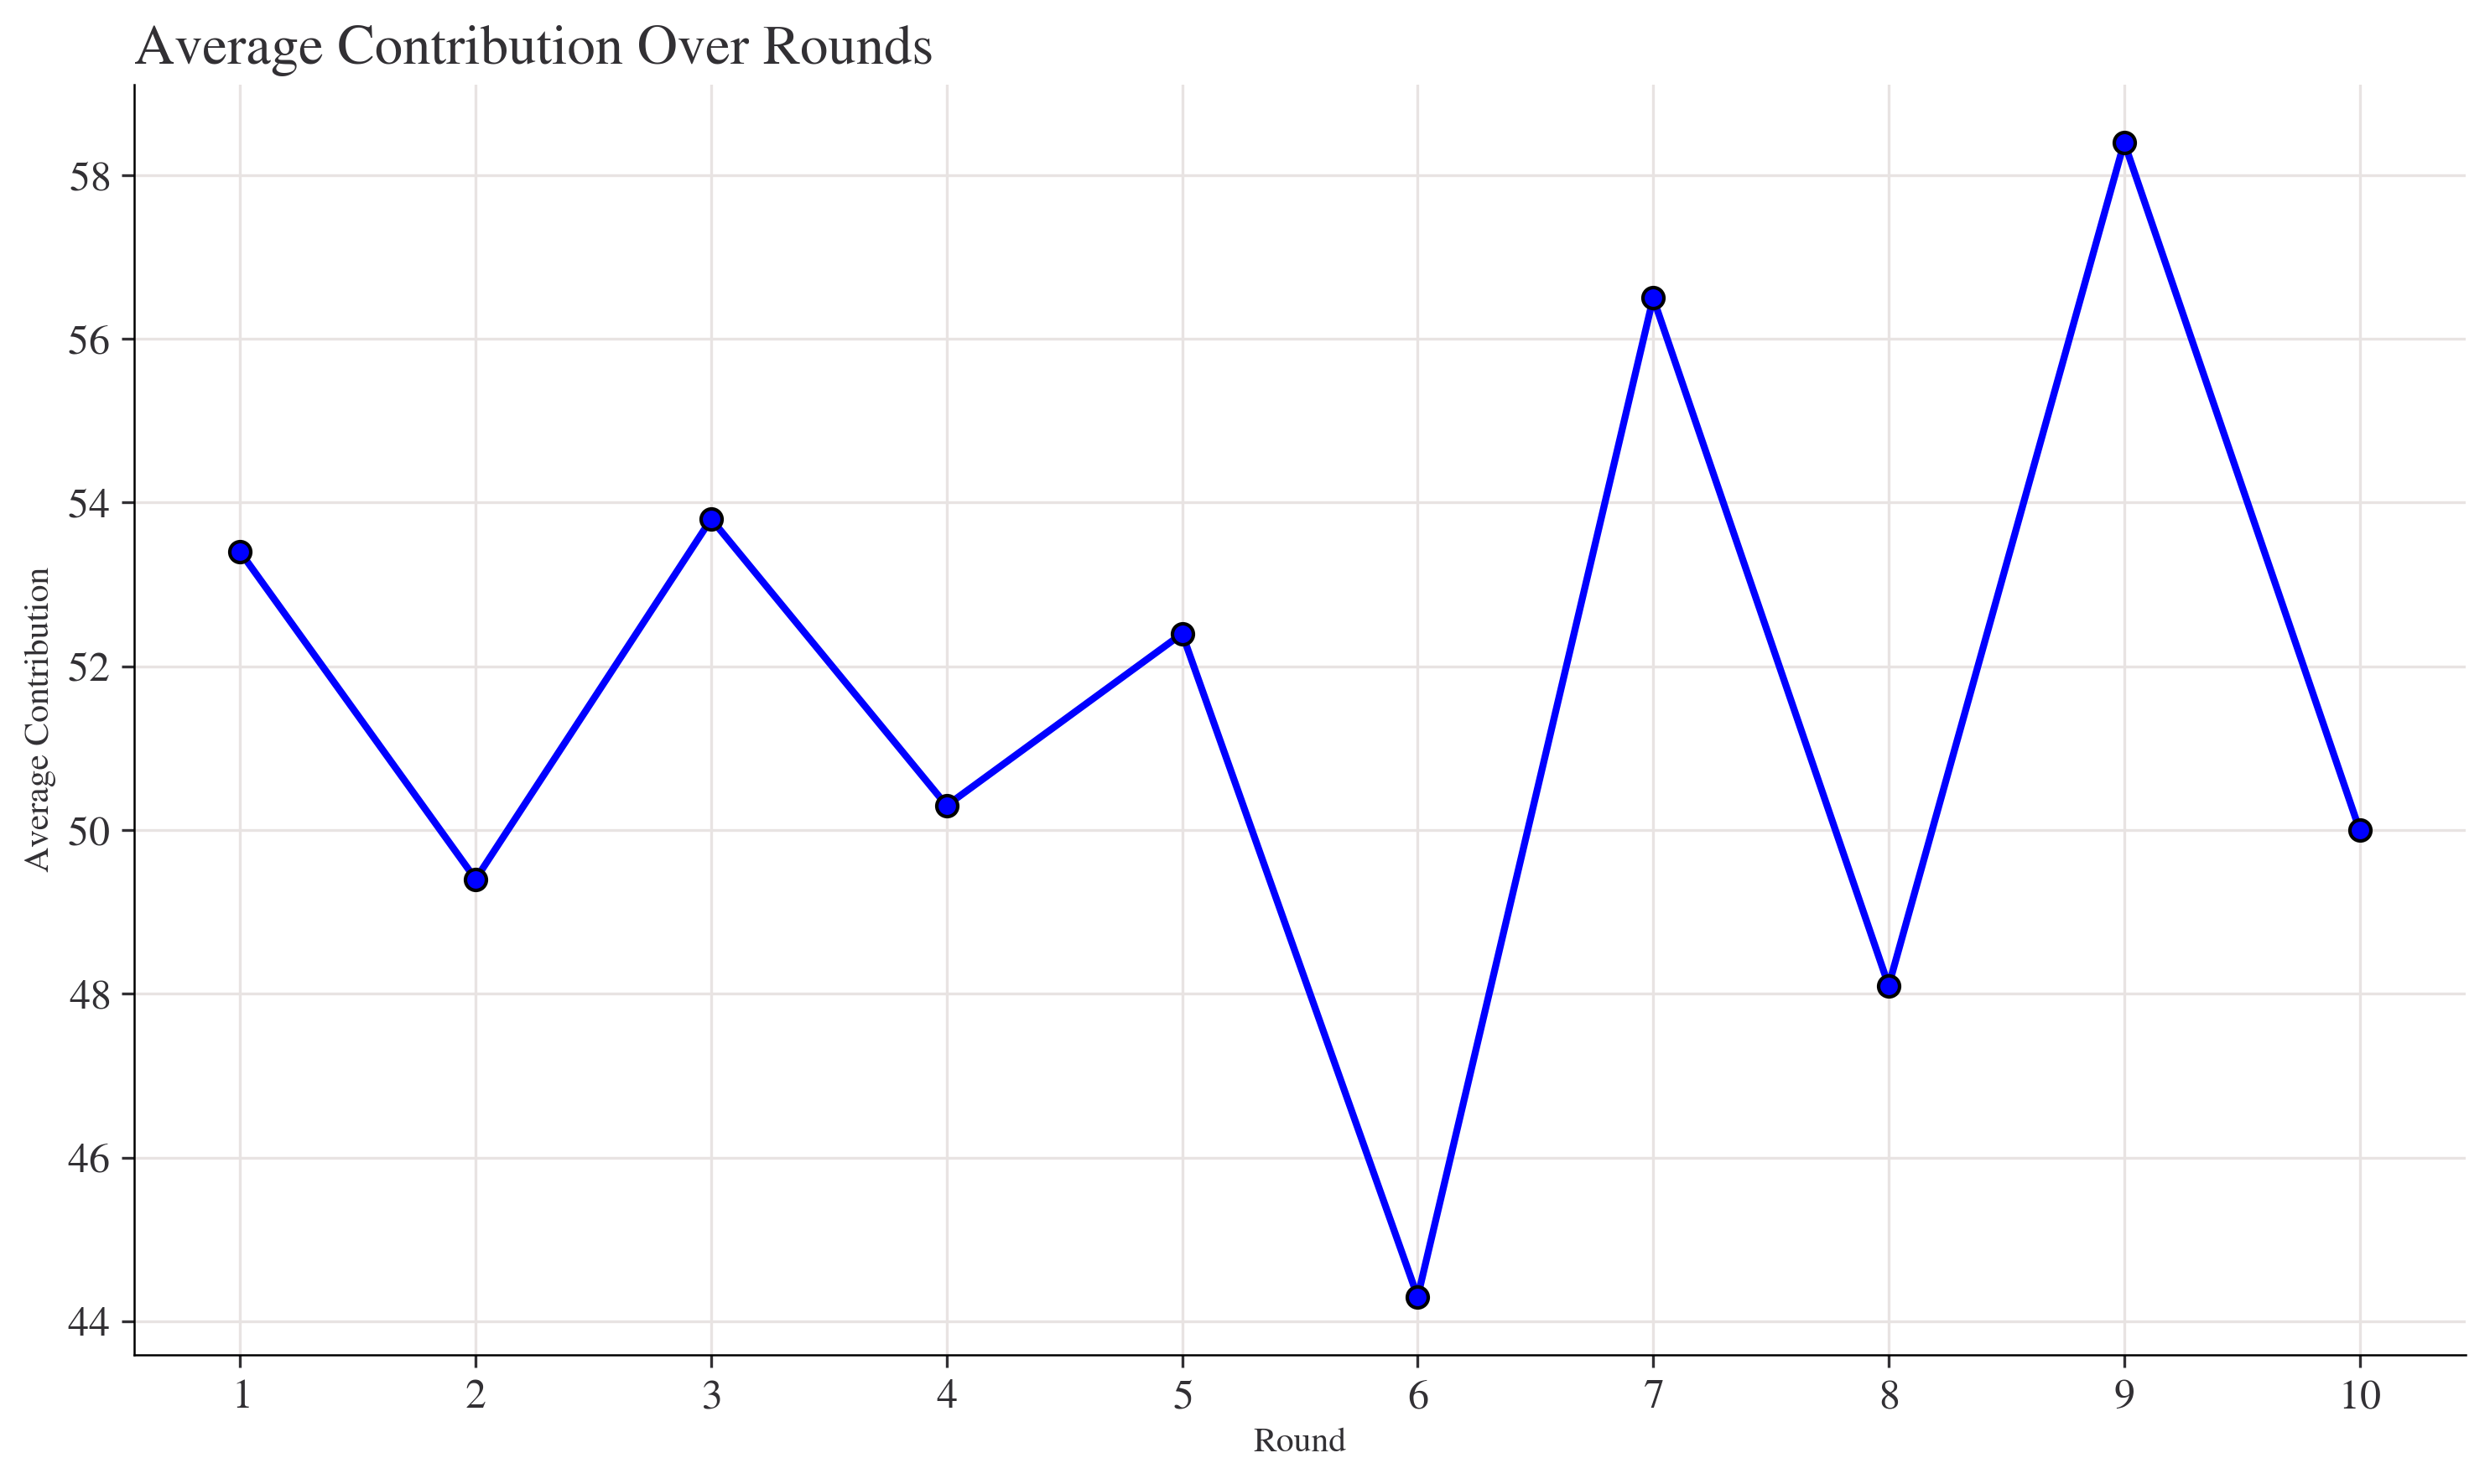

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(avg_contribution_df['Round'], avg_contribution_df['Average Contribution'], marker='o', linestyle='-', color='b')
plt.title('Average Contribution Over Rounds')
plt.xlabel('Round')
plt.ylabel('Average Contribution')
plt.grid(True)
plt.xticks(round_numbers)
plt.tight_layout()

In [61]:
avg_contribution_description = f"""
Average contributions have varied across the 10 rounds of the game. Here are the key observations:
- Round 1: {avg_contribution_df.loc[avg_contribution_df['Round'] == 1, 'Average Contribution'].values[0]}
- Round 10: {avg_contribution_df.loc[avg_contribution_df['Round'] == 10, 'Average Contribution'].values[0]}
- Highest Average Contribution: {avg_contribution_df['Average Contribution'].max()} (Round {avg_contribution_df['Average Contribution'].idxmax() + 1})
- Lowest Average Contribution: {avg_contribution_df['Average Contribution'].min()} (Round {avg_contribution_df['Average Contribution'].idxmin() + 1})
"""
print(avg_contribution_description)
plt.show()


Average contributions have varied across the 10 rounds of the game. Here are the key observations:
- Round 1: 53.4
- Round 10: 50
- Highest Average Contribution: 58.4 (Round 9)
- Lowest Average Contribution: 44.3 (Round 6)


In [62]:
# Create a dictionary with the data in
data = {
    "Copenhagen": [14.1, 14.1, 13.7, 12.9, 12.3, 11.7, 10.8, 10.6, 9.8, 5.3],
    "Dniprop": [11.0, 12.6, 12.1, 11.2, 11.3, 10.5, 9.5, 10.3, 9.0, 8.7],
    "Minsk": [12.8, 12.3, 12.6, 12.3, 11.8, 9.9, 9.9, 8.4, 8.3, 6.9],
}


df = pd.DataFrame.from_dict(data)
df.head()

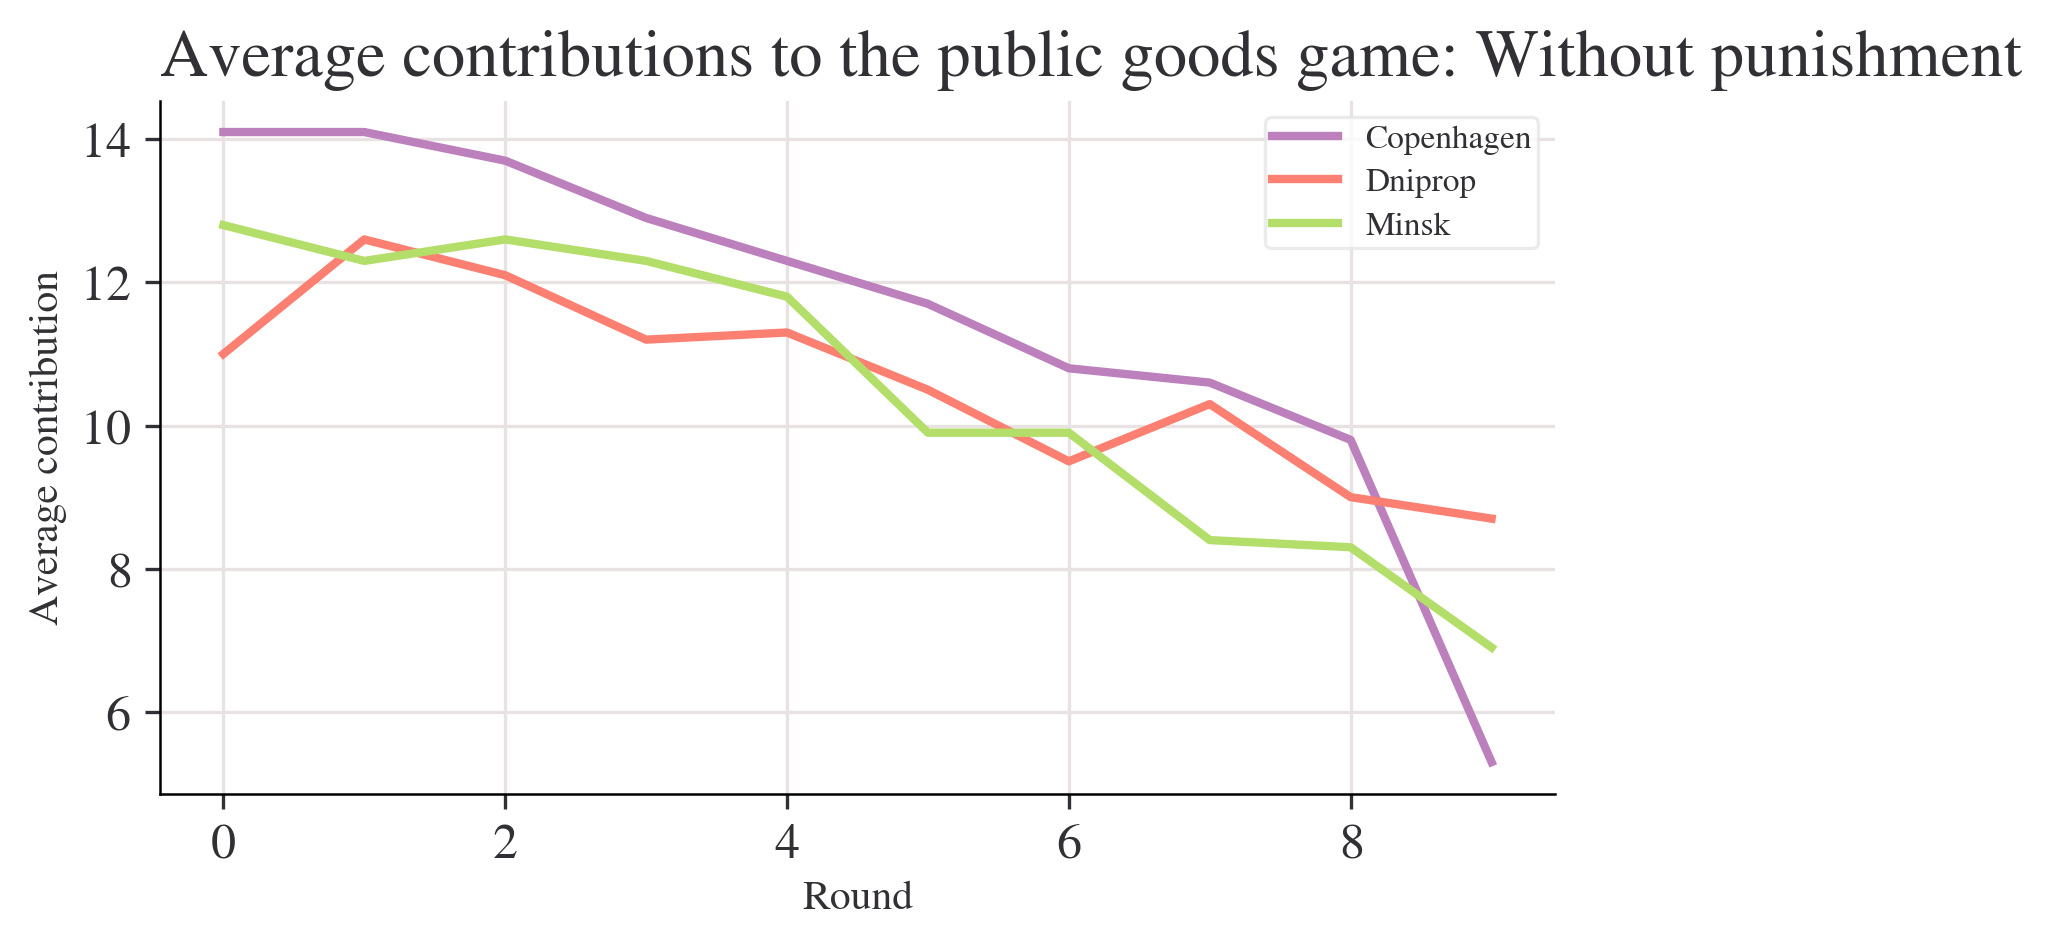

In [63]:
# Plot the data
fig, ax = plt.subplots()
df.plot(ax=ax)
ax.set_title("Average contributions to the public goods game: Without punishment")
ax.set_ylabel("Average contribution")
ax.set_xlabel("Round");

In [64]:
import pandas as pd

In [65]:
file_path = "doing-economics-datafile-working-in-excel-project-2.xlsx"

In [66]:
without_punishment = pd.read_excel(file_path, sheet_name=0, skiprows=1, nrows=10, usecols="B:Q")
without_punishment['Mean Contribution (Without Punishment)'] = without_punishment.mean(axis=1)

In [67]:
with_punishment = pd.read_excel(file_path, sheet_name=0, skiprows=28, nrows=10, usecols="B:Q")
with_punishment['Mean Contribution (With Punishment)'] = with_punishment.mean(axis=1)

C:\Users\llll\AppData\Roaming\Python\Python310\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)

In [68]:
print("Mean Contributions Without Punishment:")
print(without_punishment[['Mean Contribution (Without Punishment)']])

print("\nMean Contributions With Punishment:")
print(with_punishment[['Mean Contribution (With Punishment)']])

Mean Contributions Without Punishment:
   Mean Contribution (Without Punishment)
0                               10.578313
1                               10.628398
2                               10.407079
3                                9.813033
4                                9.305433
5                                8.454844
6                                7.837568
7                                7.376388
8                                6.392985
9                                4.383769

Mean Contributions With Punishment:
Empty DataFrame
Columns: [Mean Contribution (With Punishment)]
Index: []

In [69]:
pip install pandas matplotlib openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = 'doing-economics-datafile-working-in-excel-project-2.xlsx'
df = pd.read_excel(file_path, sheet_name=None)

C:\Users\llll\AppData\Roaming\Python\Python310\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)

In [71]:
without_punishment = pd.DataFrame()
with_punishment = pd.DataFrame()

In [72]:
for sheet_name, data in df.items():
    if 'without punishment' in sheet_name.lower():
        data = data.iloc[2:]

In [73]:
for sheet_name, data in df.items():
    if 'without punishment' in sheet_name.lower():
        data = data.iloc[2:]
        mean_contributions = data.iloc[:, 1:].mean(axis=1)  
        mean_contributions['Period'] = range(1, len(mean_contributions) + 1)
        mean_contributions.set_index('Period', inplace=True)
        mean_contributions.rename(columns={0: 'Mean Contribution'}, inplace=True)
        if without_punishment.empty:
            without_punishment = mean_contributions.copy()
        else:
            without_punishment = pd.concat([without_punishment, mean_contributions], ignore_index=True)
            
    elif 'with punishment' in sheet_name.lower():
        data = data.iloc[2:]
        mean_contributions = data.iloc[:, 1:].mean(axis=1)
        mean_contributions['Period'] = range(1, len(mean_contributions) + 1)
        mean_contributions.set_index('Period', inplace=True)
        mean_contributions.rename(columns={0: 'Mean Contribution'}, inplace=True)
        
        if with_punishment.empty:
            with_punishment = mean_contributions.copy()
        else:
            with_punishment = pd.concat([with_punishment, mean_contributions], ignore_index=True)

In [74]:
import pandas as pd

data_np = pd.read_excel(
    'C:/Users/llll/Desktop/xujin homework/practice/doing-economics-datafile-working-in-excel-project-2.xlsx',
    usecols="A:Q",
    header=1,
    index_col="Period",
)

C:\Users\llll\AppData\Roaming\Python\Python310\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)

In [75]:
data_n = data_np.iloc[:10, :].copy()
data_p = data_np.iloc[14:24, :].copy()

In [76]:
test_data = {
    "City A": [14.1, 14.1, 13.7],
    "City B": [11.0, 12.6, 12.1],
}

In [77]:
# Original dataframe
test_df = pd.DataFrame.from_dict(test_data)
# A copy of the dataframe
test_copy = test_df.copy()
# A pointer to the dataframe
test_pointer = test_df


test_pointer.iloc[1, 1] = 99

In [78]:
print("test_df=")
print(f"{test_df}\n")
print("test_copy=")
print(f"{test_copy}\n")

test_df=
   City A  City B
0    14.1    11.0
1    14.1    99.0
2    13.7    12.1

test_copy=
   City A  City B
0    14.1    11.0
1    14.1    12.6
2    13.7    12.1


In [79]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Copenhagen       10 non-null     object
 1   Dnipropetrovs’k  10 non-null     object
 2   Minsk            10 non-null     object
 3   St. Gallen       10 non-null     object
 4   Muscat           10 non-null     object
 5   Samara           10 non-null     object
 6   Zurich           10 non-null     object
 7   Boston           10 non-null     object
 8   Bonn             10 non-null     object
 9   Chengdu          10 non-null     object
 10  Seoul            10 non-null     object
 11  Riyadh           10 non-null     object
 12  Nottingham       10 non-null     object
 13  Athens           10 non-null     object
 14  Istanbul         10 non-null     object
 15  Melbourne        10 non-null     object
dtypes: object(16)
memory usage: 1.3+ KB

In [80]:
data_n = data_n.astype("double")
data_p = data_p.astype("double")

In [81]:
# 使用 pd.to_numeric 转换，将无法转换的值设置为 NaN
data_n = data_n.apply(pd.to_numeric, errors='coerce')
data_p = data_p.apply(pd.to_numeric, errors='coerce')

# 检查数据类型
print(data_n.dtypes)
print(data_p.dtypes)

Copenhagen         float64
Dnipropetrovs’k    float64
Minsk              float64
St. Gallen         float64
Muscat             float64
Samara             float64
Zurich             float64
Boston             float64
Bonn               float64
Chengdu            float64
Seoul              float64
Riyadh             float64
Nottingham         float64
Athens             float64
Istanbul           float64
Melbourne          float64
dtype: object
Copenhagen         float64
Dnipropetrovs’k    float64
Minsk              float64
St. Gallen         float64
Muscat             float64
Samara             float64
Zurich             float64
Boston             float64
Bonn               float64
Chengdu            float64
Seoul              float64
Riyadh             float64
Nottingham         float64
Athens             float64
Istanbul           float64
Melbourne          float64
dtype: object

In [82]:
import numpy as np
mean_n_c = data_n.mean(axis=1)
mean_p_c = data_p.agg(np.mean, axis=1)

C:\Users\llll\AppData\Local\Temp\ipykernel_15472\527227325.py:3: FutureWarning: The provided callable <function mean at 0x0000022EFBBD2440> is currently using DataFrame.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_p_c = data_p.agg(np.mean, axis=1)

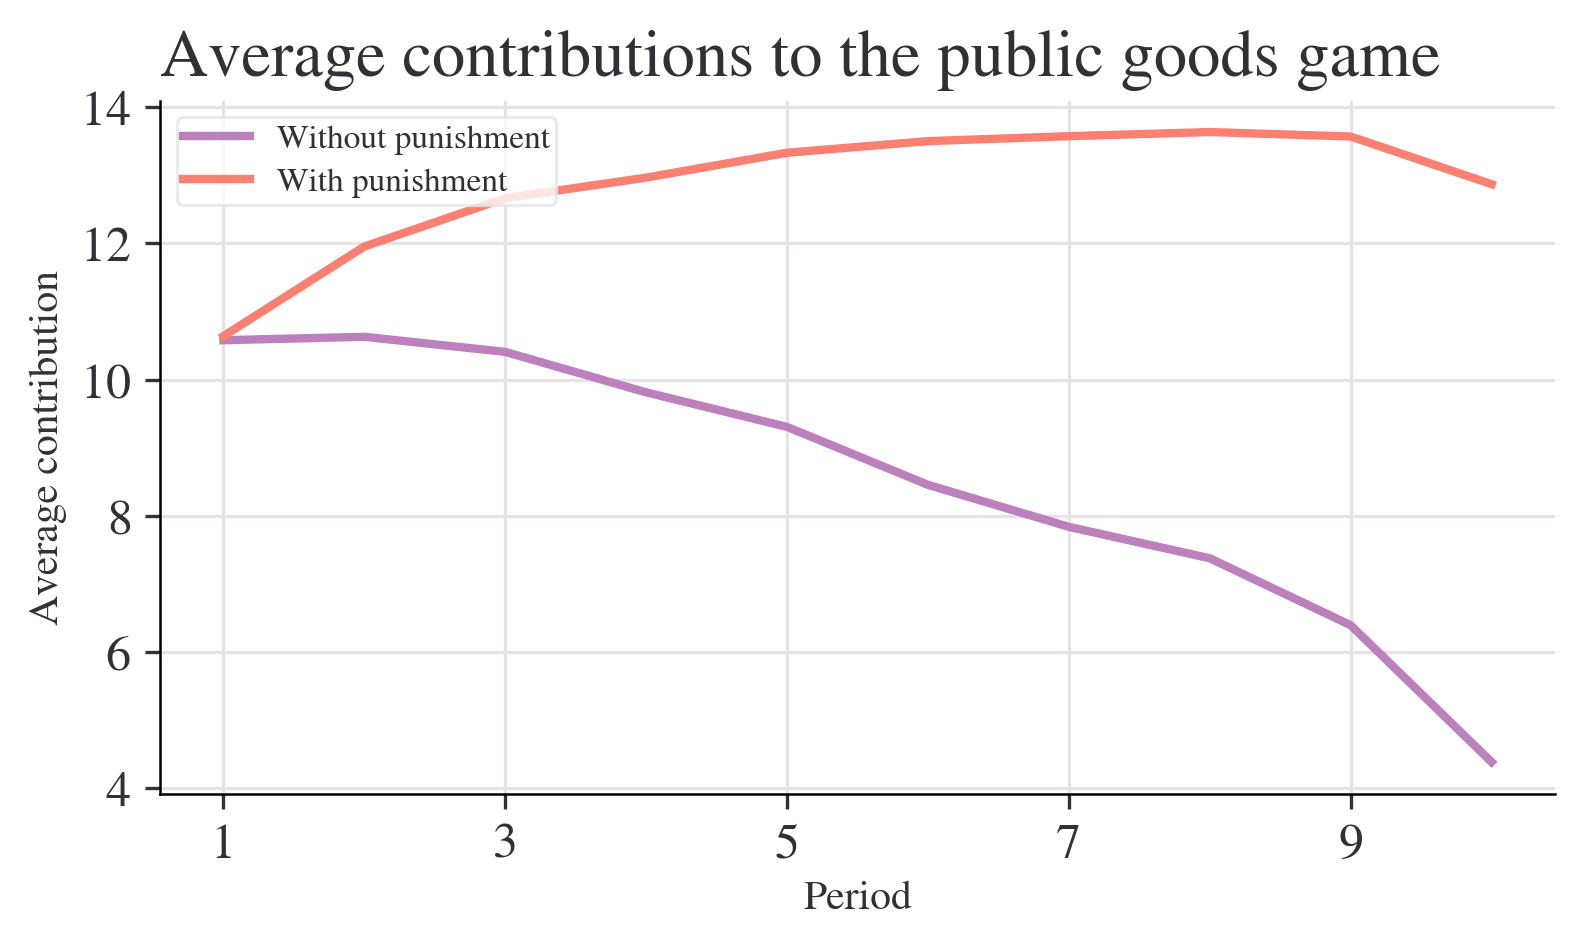

In [83]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
mean_n_c.plot(ax=ax, label="Without punishment")
mean_p_c.plot(ax=ax, label="With punishment")
ax.set_title("Average contributions to the public goods game")
ax.set_ylabel("Average contribution")
ax.legend();

In [84]:
partial_names_list = ["F. Kennedy", "Lennon", "Maynard Keynes", "Wayne"]
["John " + name for name in partial_names_list]

['John F. Kennedy', 'John Lennon', 'John Maynard Keynes', 'John Wayne']

In [85]:
['John F. Kennedy', 'John Lennon', 'John Maynard Keynes', 'John Wayne']

['John F. Kennedy', 'John Lennon', 'John Maynard Keynes', 'John Wayne']

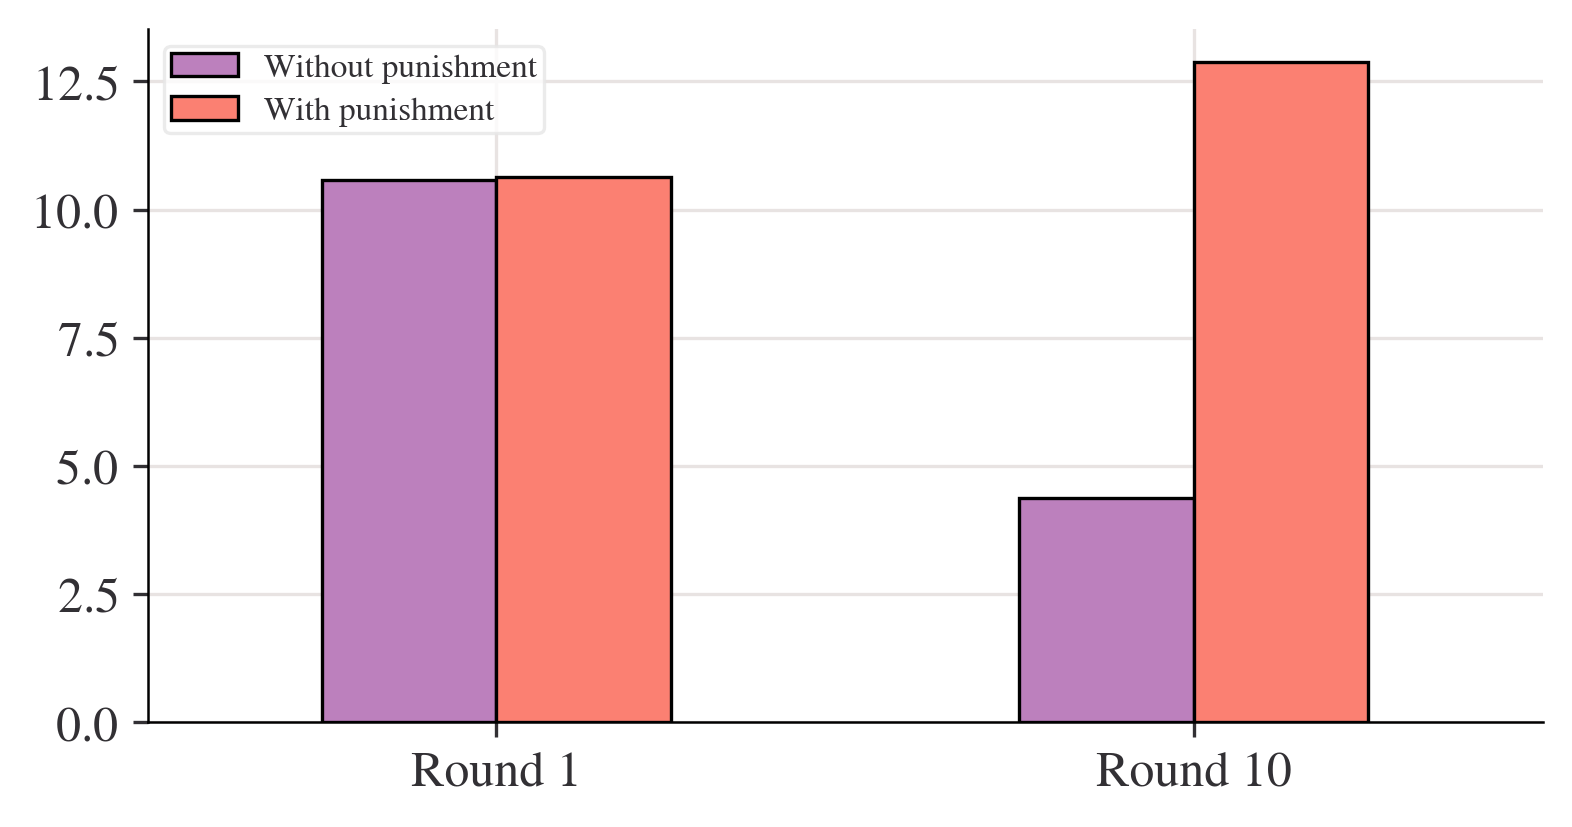

In [86]:
# Create new dataframe with bars in
compare_grps = pd.DataFrame(
    [mean_n_c.loc[[1, 10]], mean_p_c.loc[[1, 10]]],
    index=["Without punishment", "With punishment"],
)
# Rename columns to have 'round' in them
compare_grps.columns = ["Round " + str(i) for i in compare_grps.columns]
# Swap the column and index variables around with the transpose function, ready for plotting (.T is transpose)
compare_grps = compare_grps.T
# Make a bar chart
compare_grps.plot.bar(rot=0);

In [87]:
n_c = data_n.agg(["std", "var", "mean"], 1)
n_c

In [88]:
p_c = data_p.agg(["std", "var", "mean"], 1)

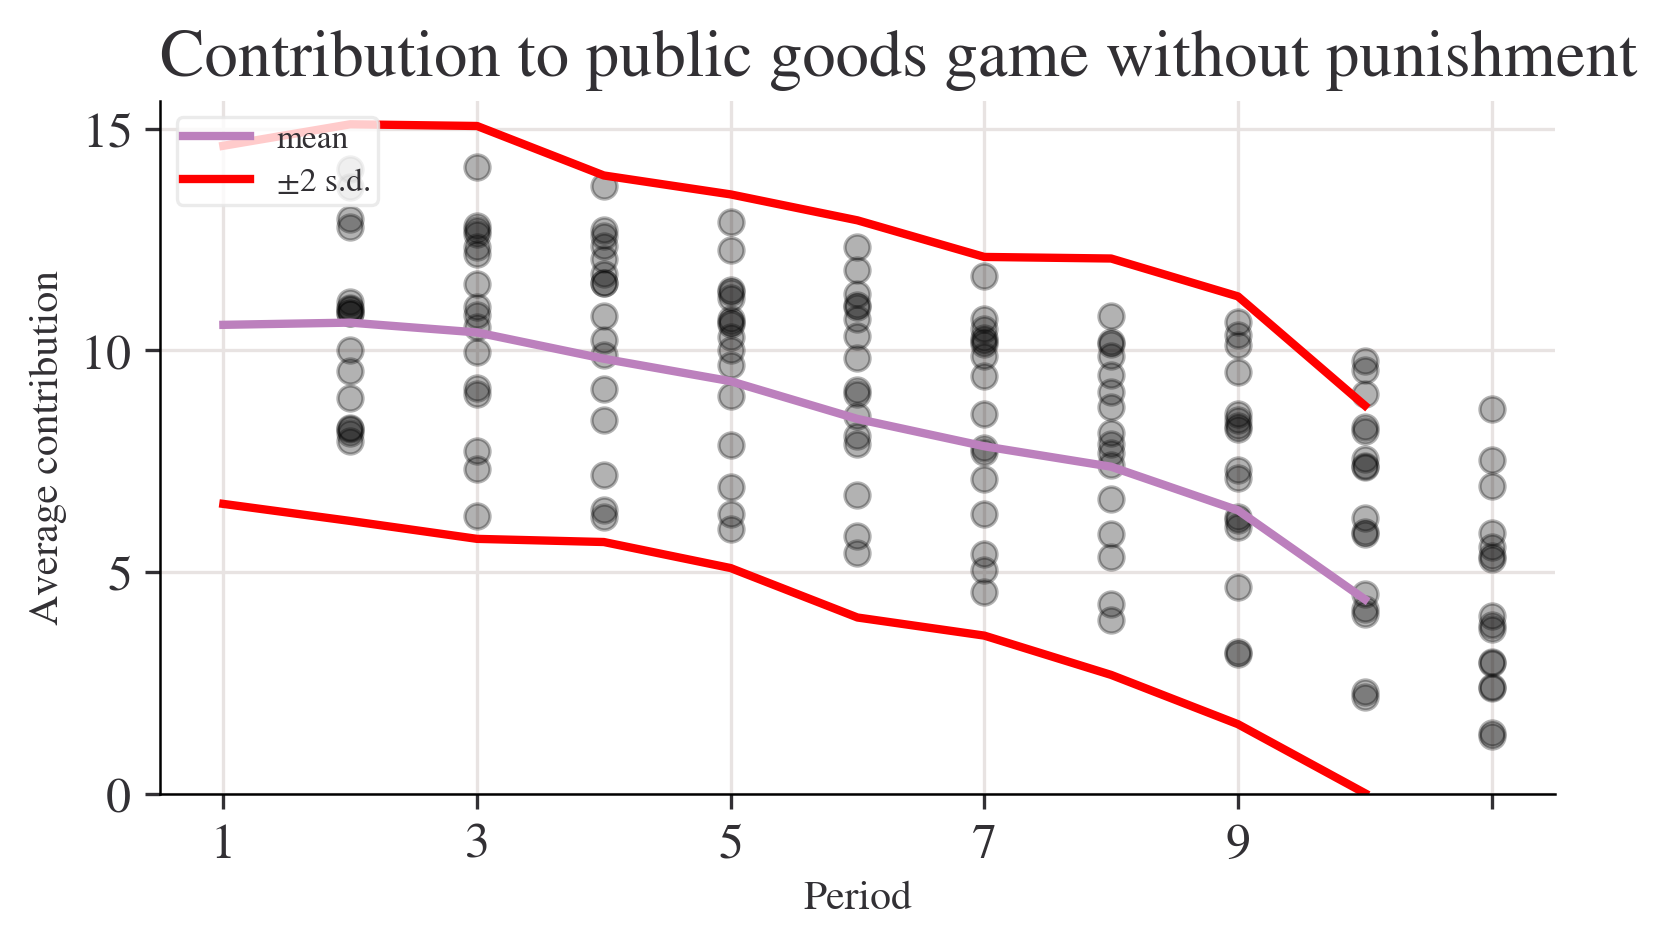

In [89]:
fig, ax = plt.subplots()
n_c["mean"].plot(ax=ax, label="mean")
# mean + 2 standard deviations
(n_c["mean"] + 2 * n_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="±2 s.d.")
# mean - 2 standard deviations
(n_c["mean"] - 2 * n_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="")
for i in range(len(data_n.columns)):
    ax.scatter(x=data_n.index, y=data_n.iloc[:, i], color="k", alpha=0.3)
ax.legend()
ax.set_ylabel("Average contribution")
ax.set_title("Contribution to public goods game without punishment")
plt.show();

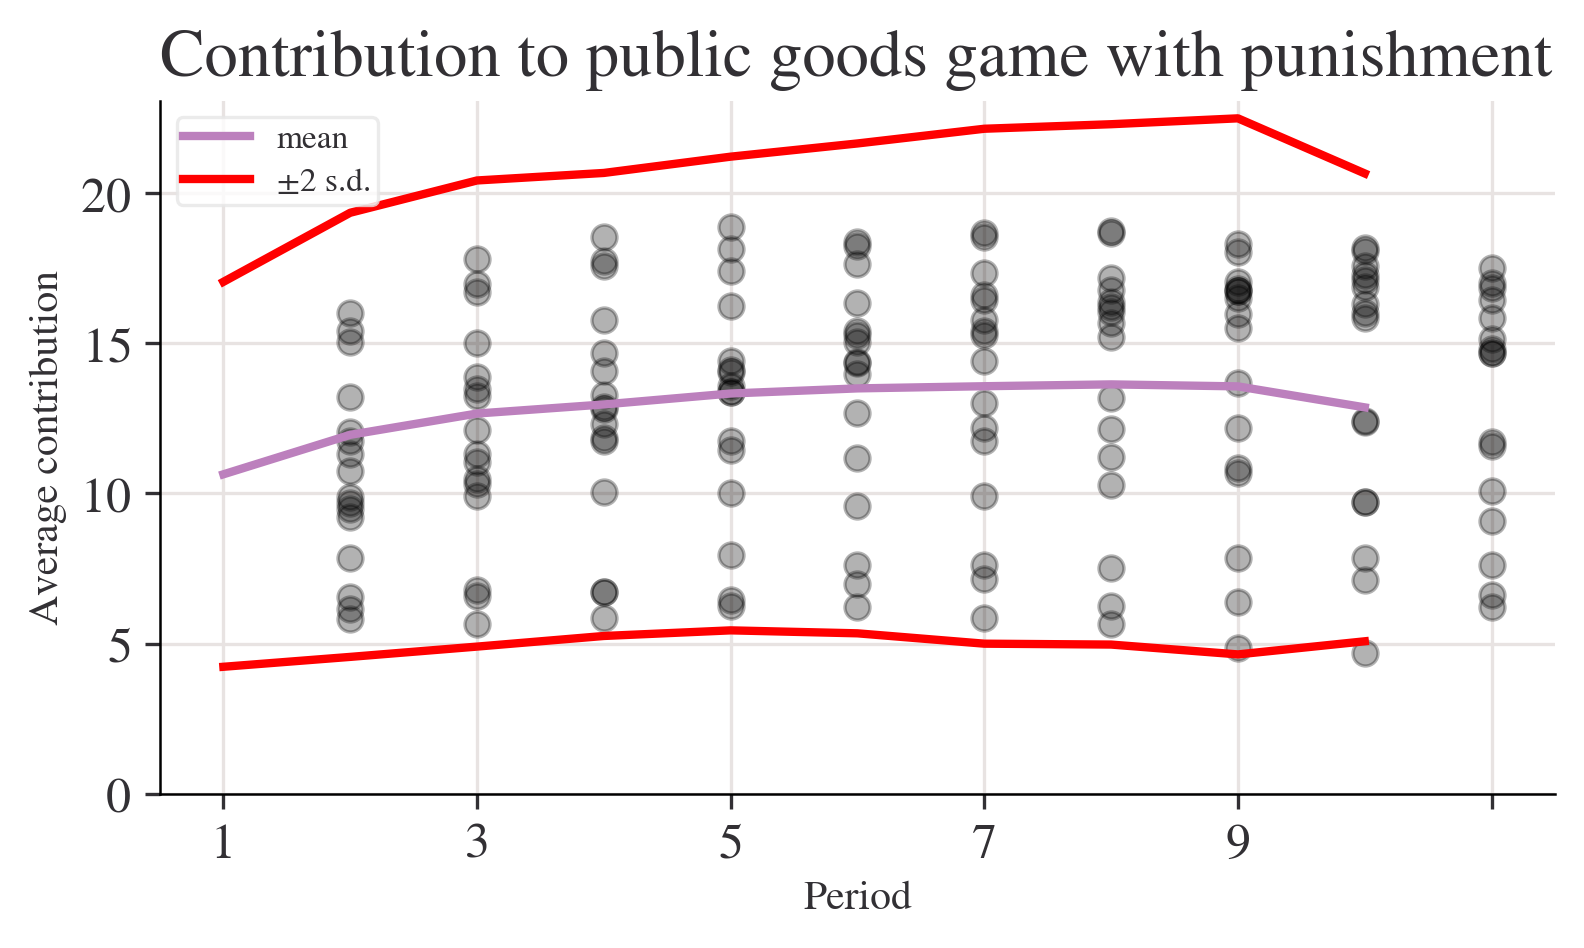

In [90]:
fig, ax = plt.subplots()
p_c["mean"].plot(ax=ax, label="mean")
# mean + 2 sd
(p_c["mean"] + 2 * p_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="±2 s.d.")
# mean - 2 sd
(p_c["mean"] - 2 * p_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="")
for i in range(len(data_p.columns)):
    ax.scatter(x=data_p.index, y=data_p.iloc[:, i], color="k", alpha=0.3)
ax.legend()
ax.set_ylabel("Average contribution")
ax.set_title("Contribution to public goods game with punishment")
plt.show();

In [91]:
data_p.apply(lambda x: x.max() - x.min(), axis=1)

Period
1     10.199675
2     12.185065
3     12.689935
4     12.625000
5     12.140375
6     12.827541
7     13.098931
8     13.482621
9     13.496754
10    11.307360
dtype: float64

In [92]:
# A lambda function accepting three inputs, a, b, and c, and calculating the sum of the squares
test_function = lambda a, b, c: a**2 + b**2 + c**2


# Now we apply the function by handing over (in parenthesis) the following inputs: a=3, b=4 and c=5
test_function(3, 4, 5)

50

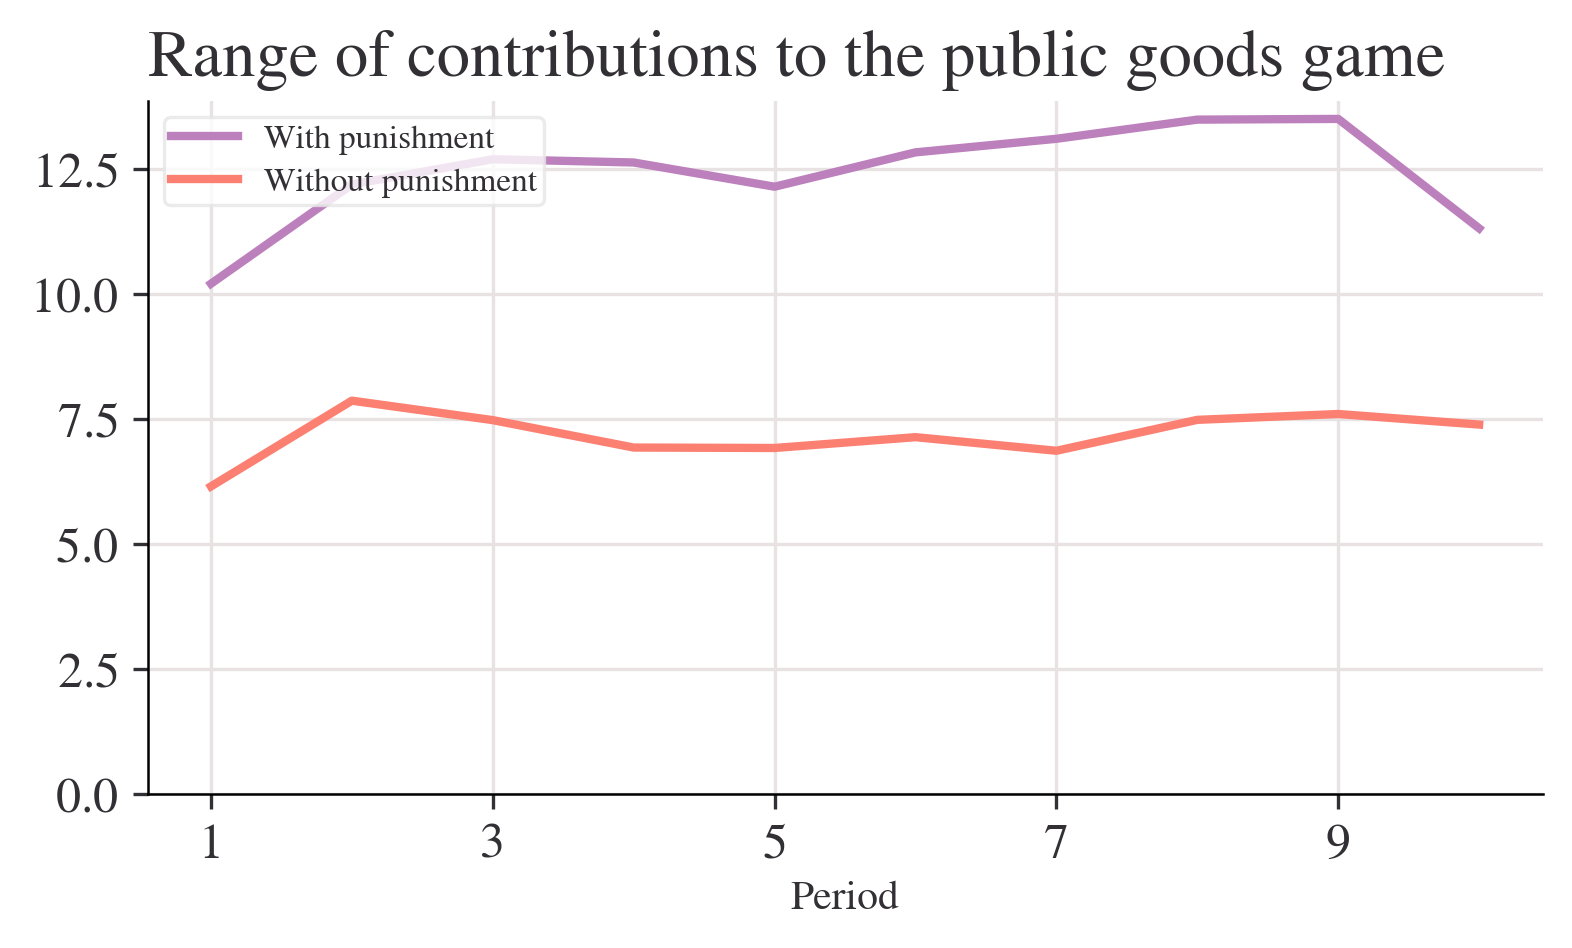

In [93]:
range_function = lambda x: x.max() - x.min()
range_p = data_p.apply(range_function, axis=1)
range_n = data_n.apply(range_function, axis=1)
fig, ax = plt.subplots()
range_p.plot(ax=ax, label="With punishment")
range_n.plot(ax=ax, label="Without punishment")
ax.set_ylim(0, None)
ax.legend()
ax.set_title("Range of contributions to the public goods game")
plt.show();

In [94]:
funcs_to_apply = [range_function, "max", "min", "std", "mean"]
summ_p = data_p.apply(funcs_to_apply, axis=1).rename(columns={"<lambda>": "range"})
summ_n = data_n.apply(funcs_to_apply, axis=1).rename(columns={"<lambda>": "range"})

In [95]:
summ_n.loc[[1, 10], :].round(2)

In [96]:
summ_p.loc[[1, 10], :].round(2)

In [97]:
import pingouin as pg
pg.ttest(x=data_n.iloc[0, :], y=data_p.iloc[0, :])

In [98]:
pg.ttest(x=data_n.iloc[0, :], y=data_p.iloc[0, :], paired=True)

In [99]:
# 创建一个包含索引1到11的新索引
new_index = range(1, 12)
# 重新索引DataFrame，包括不存在的索引10
reindexed_summ_n = summ_n.reindex(new_index)
# 现在您可以安全地访问索引10（尽管它的值将是NaN）
print(reindexed_summ_n.loc[10, :].round(2))

range    7.38
max      8.68
min      1.30
std      2.19
mean     4.38
Name: 10, dtype: float64